In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_excel('data.xlsx').drop(['DP', 'Obs', 'Camera1'], axis=1)
df

,num_plt,BBL,y0_RGB,ymax_RGB,k_RGB,lag_RGB,y0_Depth,ymax_Depth,k_Depth,lag_Depth,...,Depth_HDR_day_14,Depth_HDR_day_15,Depth_HDR_day_16,Depth_HDR_day_17,Depth_HDR_day_18,Depth_HDR_day_19,Depth_HDR_day_20,Depth_HDR_day_21,Depth_HDR_day_22,Depth_HDR_day_23
0,1,5,43.47181,191.70982,36.651831,10.818066,-0.513466,230.428767,39.62176,14.576055,...,729.532886,689.897413,673.154790,995.496657,1487.217470,1699.730125,2135.822852,NaN,NaN,NaN
1,2,8,37.28842,168.22419,42.042923,10.543538,0.574369,160.132059,39.22763,14.205783,...,820.625941,951.260357,694.941300,812.723126,1562.374445,1656.227730,1997.947284,NaN,NaN,NaN
2,3,4,46.58950,181.06181,32.390335,8.786561,-0.135260,187.237266,38.38353,13.839630,...,875.424511,637.537972,946.617770,719.689034,1457.073074,2035.957304,1573.451626,NaN,NaN,NaN
3,4,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.780545,2344.517367,1683.992963,665.063663,302.576654,237.198333,451.384676,NaN,NaN,NaN
4,5,11,44.18902,212.87544,31.542620,13.068265,NaN,NaN,NaN,NaN,...,76.167940,245.839194,353.730785,523.471416,826.295519,1054.595003,1131.501438,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,380,51,28.39635,526.99657,36.875688,12.147212,NaN,NaN,NaN,NaN,...,213.973488,99.114434,95.983731,93.550040,94.341009,94.333313,95.549878,106.572733,NaN,NaN
380,381,39,39.43129,225.21235,24.869104,8.353164,NaN,NaN,NaN,NaN,...,173.787893,103.522955,105.443813,89.366461,87.721470,109.500937,95.965159,102.380845,NaN,NaN
381,382,40,36.50042,215.70017,27.836863,7.588825,NaN,NaN,NaN,NaN,...,192.465106,96.087531,98.298258,96.601178,103.024686,104.896838,103.127211,127.458186,NaN,NaN
382,383,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,174.256073,252.197958,155.795305,95.549726,95.194642,93.126475,92.340900,91.445872,NaN,NaN


In [14]:
#get the max value for each row given certain columns
a = df[[f"Depth_Daily_slope_mm_per_day_{i}" for i in range(1,24)]].max(axis=1)
b = df[[f"RGB_Daily_slope_mm_per_day_{i}" for i in range(1,24)]].min(axis=1)

#add the max values to the dataframe
df['Depth_slope_mm_max'] = a
df['RGB_slope_mm_min'] = b
df

,num_plt,BBL,y0_RGB,ymax_RGB,k_RGB,lag_RGB,y0_Depth,ymax_Depth,k_Depth,lag_Depth,...,Depth_HDR_day_18,Depth_HDR_day_19,Depth_HDR_day_20,Depth_HDR_day_21,Depth_HDR_day_22,Depth_HDR_day_23,Depth_Daily_slope_mm_per_day_max,RGB_Daily_slope_mm_per_day_min,Depth_slope_mm_max,RGB_slope_mm_min
0,1,5,43.47181,191.70982,36.651831,10.818066,-0.513466,230.428767,39.62176,14.576055,...,1487.217470,1699.730125,2135.822852,NaN,NaN,NaN,14.374777,-5.455986,14.374777,-5.455986
1,2,8,37.28842,168.22419,42.042923,10.543538,0.574369,160.132059,39.22763,14.205783,...,1562.374445,1656.227730,1997.947284,NaN,NaN,NaN,18.037828,-16.054065,18.037828,-16.054065
2,3,4,46.58950,181.06181,32.390335,8.786561,-0.135260,187.237266,38.38353,13.839630,...,1457.073074,2035.957304,1573.451626,NaN,NaN,NaN,20.559167,-16.458026,20.559167,-16.458026
3,4,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,302.576654,237.198333,451.384676,NaN,NaN,NaN,15.087385,-8.677617,15.087385,-8.677617
4,5,11,44.18902,212.87544,31.542620,13.068265,NaN,NaN,NaN,NaN,...,826.295519,1054.595003,1131.501438,NaN,NaN,NaN,16.922879,-6.916065,16.922879,-6.916065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,380,51,28.39635,526.99657,36.875688,12.147212,NaN,NaN,NaN,NaN,...,94.341009,94.333313,95.549878,106.572733,NaN,NaN,441.530439,-5.599721,441.530439,-5.599721
380,381,39,39.43129,225.21235,24.869104,8.353164,NaN,NaN,NaN,NaN,...,87.721470,109.500937,95.965159,102.380845,NaN,NaN,382.602668,-4.007456,382.602668,-4.007456
381,382,40,36.50042,215.70017,27.836863,7.588825,NaN,NaN,NaN,NaN,...,103.024686,104.896838,103.127211,127.458186,NaN,NaN,640.013820,-2.308395,640.013820,-2.308395
382,383,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.194642,93.126475,92.340900,91.445872,NaN,NaN,386.551339,-2.952485,386.551339,-2.952485


In [18]:
df2 = df[[i for i in df.columns if 'da' not in i.lower()]]
df2 = df2.drop(['lag_Depth', 'k_Depth', 'ymax_Depth', 'y0_Depth'], axis=1)
df2

,num_plt,BBL,y0_RGB,ymax_RGB,k_RGB,lag_RGB,Corrected_mean_Llength,Corrected_mean_Lwidth,Corrected_mean_Lwidth10_plt,color,mean_slope_RGB,mean_c1_RGB,mean_HDR_RGB,mean_slope_Depth,mean_c1_Depth,mean_HDR_Depth,Depth_slope_mm_max,RGB_slope_mm_min
0,1,5,43.47181,191.70982,36.651831,10.818066,12.966667,6.533333,2.200000,Green,6.318645,41.35486,221.4314,4.145496,1.919959,775.5215,14.374777,-5.455986
1,2,8,37.28842,168.22419,42.042923,10.543538,13.300000,5.300000,1.133333,Green,4.078587,41.77117,217.2178,3.548529,2.600321,592.2361,18.037828,-16.054065
2,3,4,46.58950,181.06181,32.390335,8.786561,15.166667,4.966667,1.200000,Green,4.088405,49.10133,219.9177,4.183322,2.397322,674.2229,20.559167,-16.458026
3,4,13,NaN,NaN,NaN,NaN,12.000000,6.233333,1.266667,Red,4.960342,33.20539,229.0454,2.799873,3.936114,1457.2236,15.087385,-8.677617
4,5,11,44.18902,212.87544,31.542620,13.068265,11.433333,3.466667,1.000000,Red,5.668172,33.81493,222.5689,3.572238,3.297669,998.2393,16.922879,-6.916065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,380,51,28.39635,526.99657,36.875688,12.147212,7.900000,3.366667,0.400000,Red,7.635637,37.25333,222.3464,-351.590244,270.584051,219.4932,441.530439,-5.599721
380,381,39,39.43129,225.21235,24.869104,8.353164,16.600000,6.600000,1.333333,Green,10.687299,41.27954,222.0455,-294.002790,228.546266,227.1264,382.602668,-4.007456
381,382,40,36.50042,215.70017,27.836863,7.588825,12.633333,4.400000,1.000000,Green,10.092651,45.37207,219.1732,-302.504323,241.824377,176.8216,640.013820,-2.308395
382,383,55,NaN,NaN,NaN,NaN,6.666667,4.800000,0.333333,Red,6.268567,30.71546,218.3556,-248.862389,222.412282,222.1188,386.551339,-2.952485


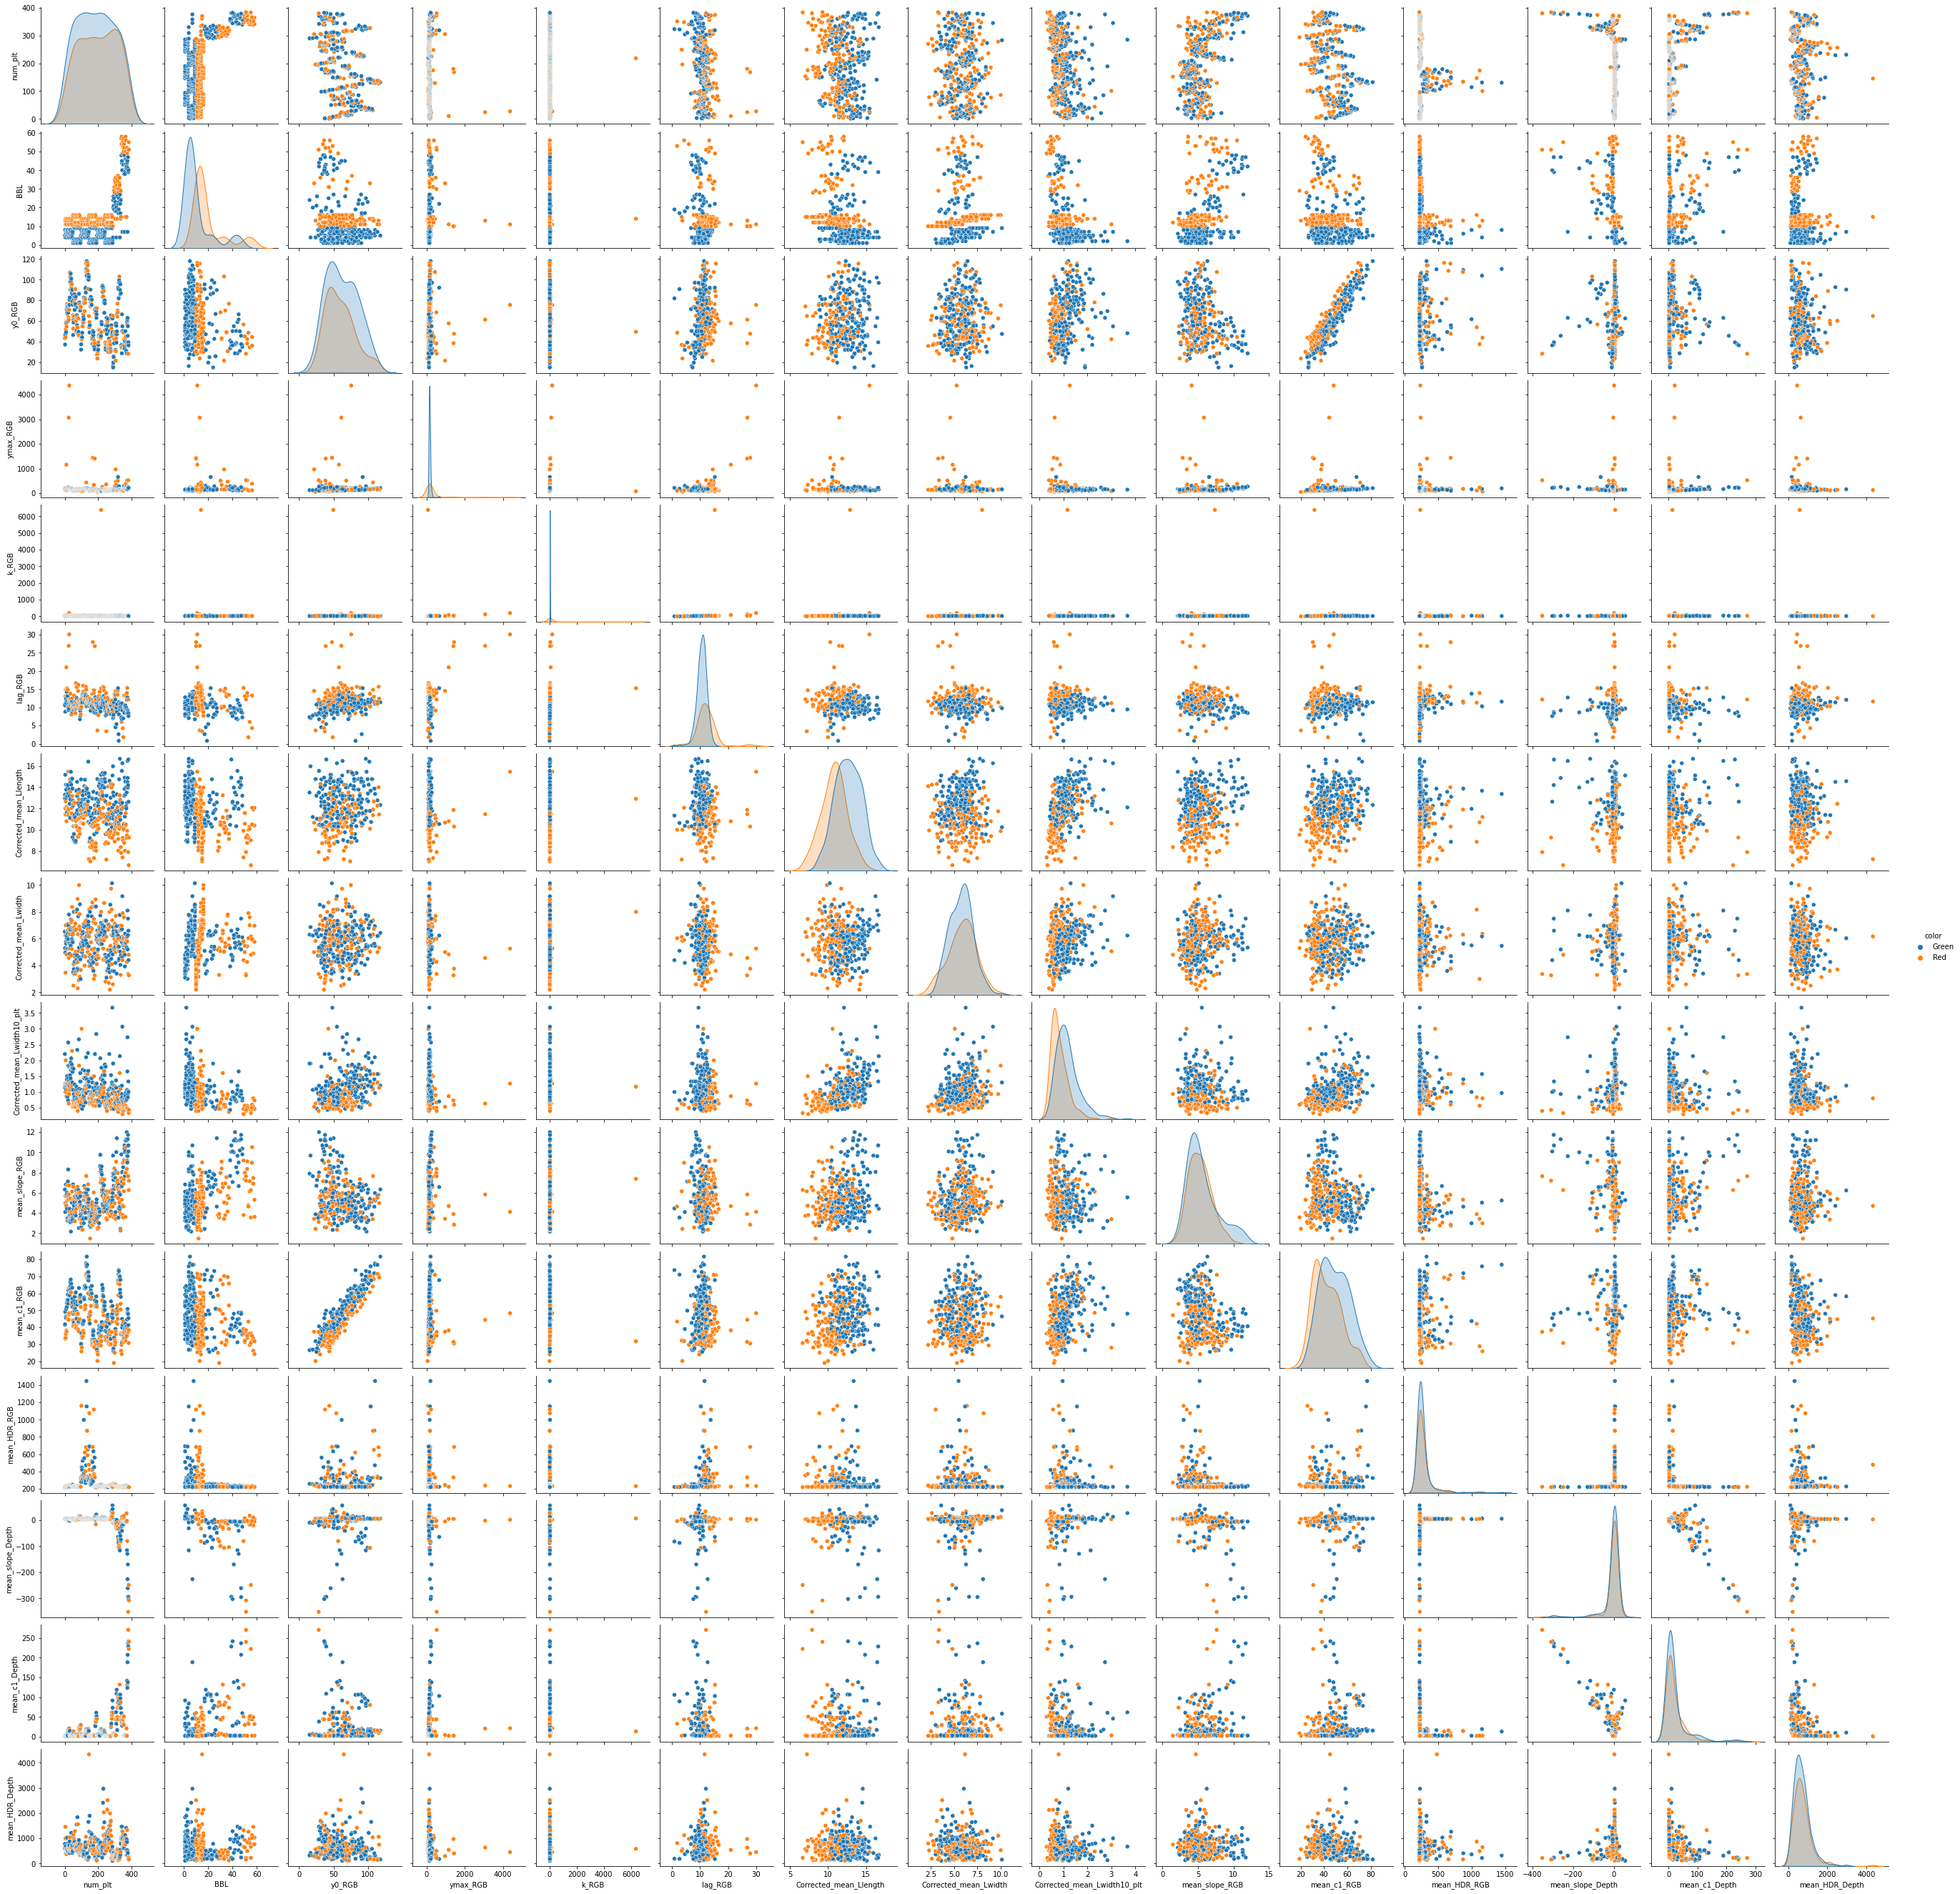

In [29]:
sns.pairplot(df2, hue="color", height=2.5)

In [19]:
# impute missing numeric values
df_numeric = df2.select_dtypes(include=np.number)
df_numeric = pd.DataFrame(SimpleImputer(strategy="mean").fit_transform(df_numeric), columns=df_numeric.columns)
#add missing categorical values
df_categorical = df2.select_dtypes(exclude=np.number)
df2 = pd.concat([df_numeric, df_categorical], axis=1)
df2

,num_plt,BBL,y0_RGB,ymax_RGB,k_RGB,lag_RGB,Corrected_mean_Llength,Corrected_mean_Lwidth,Corrected_mean_Lwidth10_plt,mean_slope_RGB,mean_c1_RGB,mean_HDR_RGB,mean_slope_Depth,mean_c1_Depth,mean_HDR_Depth,Depth_slope_mm_max,RGB_slope_mm_min,color
0,1.0,5.0,43.471810,191.709820,36.651831,10.818066,12.966667,6.533333,2.200000,6.318645,41.35486,221.4314,4.145496,1.919959,775.5215,14.374777,-5.455986,Green
1,2.0,8.0,37.288420,168.224190,42.042923,10.543538,13.300000,5.300000,1.133333,4.078587,41.77117,217.2178,3.548529,2.600321,592.2361,18.037828,-16.054065,Green
2,3.0,4.0,46.589500,181.061810,32.390335,8.786561,15.166667,4.966667,1.200000,4.088405,49.10133,219.9177,4.183322,2.397322,674.2229,20.559167,-16.458026,Green
3,4.0,13.0,61.337397,193.920382,48.163249,11.181493,12.000000,6.233333,1.266667,4.960342,33.20539,229.0454,2.799873,3.936114,1457.2236,15.087385,-8.677617,Red
4,5.0,11.0,44.189020,212.875440,31.542620,13.068265,11.433333,3.466667,1.000000,5.668172,33.81493,222.5689,3.572238,3.297669,998.2393,16.922879,-6.916065,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,380.0,51.0,28.396350,526.996570,36.875688,12.147212,7.900000,3.366667,0.400000,7.635637,37.25333,222.3464,-351.590244,270.584051,219.4932,441.530439,-5.599721,Red
380,381.0,39.0,39.431290,225.212350,24.869104,8.353164,16.600000,6.600000,1.333333,10.687299,41.27954,222.0455,-294.002790,228.546266,227.1264,382.602668,-4.007456,Green
381,382.0,40.0,36.500420,215.700170,27.836863,7.588825,12.633333,4.400000,1.000000,10.092651,45.37207,219.1732,-302.504323,241.824377,176.8216,640.013820,-2.308395,Green
382,383.0,55.0,61.337397,193.920382,48.163249,11.181493,6.666667,4.800000,0.333333,6.268567,30.71546,218.3556,-248.862389,222.412282,222.1188,386.551339,-2.952485,Red


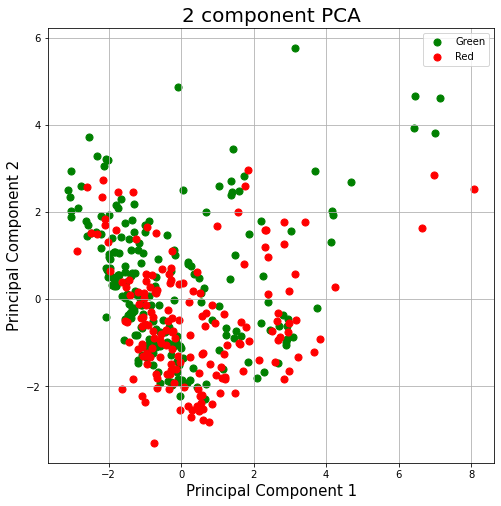

In [20]:

x = df2.drop('color', axis=1)
# Standardizing the features
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x, columns=df2.drop('color', axis=1).columns)
y = df2['color']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df2[['color']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Green', 'Red']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['color'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

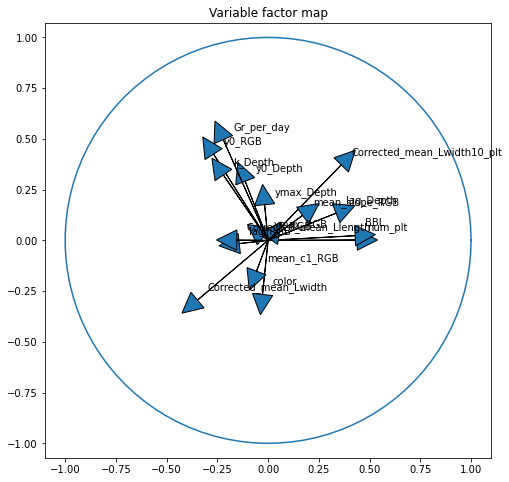

In [21]:
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

In [23]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(2)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,3.497532,21.0,21.0
1,Dim2,2.365551,14.0,34.0


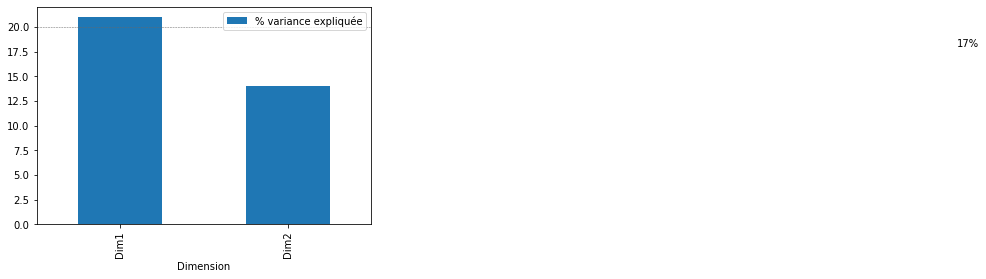

In [25]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(5, 18, "17%") # ajout de texte
plt.axhline(y = 20, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 17 = 100 / 6 (nb dimensions)
plt.show()